Hypothesis: companies with more than 1B in cash/assets have a significant difference in returns by the end of the year than those which don't.

I'll start importing all the packages I need for the research. 

In [1]:
%reload_ext nb_black


<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot


%matplotlib inline
plt.style.use("fivethirtyeight")

<IPython.core.display.Javascript object>

In [3]:
def get_95_ci(x1, x2):
    """Calculate a 95% CI for 2 1d numpy arrays"""
    signal = x1.mean() - x2.mean()
    noise = np.sqrt(x1.var() / x1.size + x2.var() / x2.size)

    ci_lo = signal - 1.96 * noise
    ci_hi = signal + 1.96 * noise

    return ci_lo, ci_hi


%matplotlib inline

<IPython.core.display.Javascript object>

This is how I'm reading the datafile, using (csv) - read a comma-separated values file into DataFrame.
giving it the variable name 'stocks' and The head() function is used to get the first n rows. This function returns the first n rows for the object based on position

In [4]:
stocks = pd.read_csv(r"C:\Users\GaukharJavarova\Downloads\aggdata.csv")
stocks.head()

,ticker,revenue,pb,debt,assets,netmargin,ncfo,shareswa,sps,opinc,...,netinccmn,fcfps,PX_TO_BOOK_RATIO,RETURN_ON_ASSET,OPER_MARGIN,CASH_FLOW_PER_SHARE,REVENUE_PER_SHARE,PX_FREE_CASH_FLOW,quick_ratio,TOT_DEBT_TO_TOTAL_ASSET
0,ZYME,8269000.0,3.091,9007000.0,636578000.0,-3.765,-37487000.0,48686718.0,0.170,-35880000.0,...,-162932000.0,-2.154,3.091,-0.358217,-4.339098,-0.823549,0.181661,-16.467038,6.807722,0.014149
1,ZYME,1877000.0,7.288,6881000.0,368205000.0,-38.489,-36354000.0,43658717.0,0.043,-73752000.0,...,-145437000.0,-2.319,7.288,-0.409374,-39.292488,-0.922987,0.047655,-19.603277,3.647265,0.018688
2,ZYME,7860000.0,3.146,6755000.0,400037000.0,-3.877,-10880000.0,43445379.0,0.181,-33564000.0,...,-63920000.0,0.004,3.146,-0.197080,-4.270229,-0.277127,0.200204,6200.000000,6.678431,0.016886
3,ZYME,7882000.0,2.112,7829000.0,414547000.0,-3.689,-13317000.0,32837975.0,0.240,-29432000.0,...,-52196000.0,0.028,2.112,-0.191239,-3.734078,-0.415356,0.245839,785.714286,8.874183,0.018886
4,ZYME,11925000.0,3.048,8065000.0,238279000.0,-1.144,-21302000.0,32020437.0,0.372,-14553000.0,...,-28993000.0,0.616,3.048,-0.130571,-1.220377,-0.665162,0.372362,26.266234,6.440652,0.033847


<IPython.core.display.Javascript object>

To get a quick overview of the dataset I use the dataframe.info() function.

In [5]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40277 entries, 0 to 40276
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticker                   40277 non-null  object 
 1   revenue                  39949 non-null  float64
 2   pb                       38433 non-null  float64
 3   debt                     39416 non-null  float64
 4   assets                   39416 non-null  float64
 5   netmargin                38980 non-null  float64
 6   ncfo                     39683 non-null  float64
 7   shareswa                 40072 non-null  float64
 8   sps                      39800 non-null  float64
 9   opinc                    39949 non-null  float64
 10  assetsc                  30302 non-null  float64
 11  liabilitiesc             30265 non-null  float64
 12  price                    38513 non-null  float64
 13  calendardate             40277 non-null  object 
 14  datekey               

<IPython.core.display.Javascript object>

The describe() function computes a summary of statistics pertaining to the DataFrame columns.
This function gives the mean, std and IQR values. And, function excludes the character columns
and given summary about numeric columns.
I'm looking at the mean of the 'cash and assets' numbers and how the cash distributed among all the 
companies we have in our data. 
These are from multiple quarters, mean is 5B, 50% 200M

In [6]:
stocks["cashneq"].describe()

count    3.941600e+04
mean     5.317810e+09
std      1.080713e+11
min      0.000000e+00
25%      7.426350e+07
50%      2.117000e+08
75%      6.499245e+08
max      5.314380e+12
Name: cashneq, dtype: float64

<IPython.core.display.Javascript object>

I'm removing NULL/NaN - missing values by dropna() function from the cashneq column, 
applying (np.log10) - the mathematical function helps me to calculate Base-10 logarithm of x where x belongs to all the input array elements. 
np.isfinite - test element-wise for finiteness (not infinity or not Not a Number).
A histogram displays my numerical data by grouping data into "bins" of equal width. Each bin is plotted as a bar whose height corresponds to how many data points are in that bin. 
here, its showing 6000 quarters, [ten the power 6] = 10^6, [10 to the power of 8] = 10^8


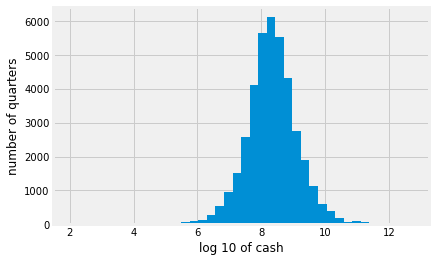

<IPython.core.display.Javascript object>

In [7]:
a = stocks["cashneq"].dropna()
b = a.apply(np.log10)
b[np.isfinite(b)].hist(bins=40)
plt.xlabel("log 10 of cash")
plt.ylabel("number of quarters")
plt.show()

I have to get stocks which meet my threshold of 1B by creating a new column 'enough cash',
assign number 1 to it and the rest of them will get 0. 

In [8]:
stocks["enough_cash"] = np.where(stocks["cashneq"] > 1000000000, 1, 0)

<IPython.core.display.Javascript object>

Now finding every record thats on 2018-03-31 = end of the first quarter.
A quarter is a three-month period on a company's financial calendar that acts as a basis for periodic financial reports and the paying of dividends. A quarter refers to one-fourth of a year and is typically expressed as "Q1” for the first quarter. 

In [9]:
df2018 = stocks[stocks["calendardate"] == "2018-03-31"] 


<IPython.core.display.Javascript object>

getting the first n rows, testing if my object has the right type of data in it. 
And I need to see if the cash is below or above the threshold at the given calendardate. 

In [10]:
df2018[["ticker", "calendardate", "enough_cash", "cashneq"]].head()

,ticker,calendardate,enough_cash,cashneq
8,ZYME,2018-03-31,0,3.098100e+07
23,ZUO,2018-03-31,0,2.027340e+08
37,ZTS,2018-03-31,1,1.654000e+09
58,ZS,2018-03-31,0,2.874430e+08
72,ZNGA,2018-03-31,0,3.715880e+08


<IPython.core.display.Javascript object>

checking how many rows we have in a df2018

In [11]:
df2018.shape

(1985, 32)

<IPython.core.display.Javascript object>

renaming the columns: price, calendardate in df2019 to price2019, calendardate2019. we're doing it to get the return from 2019-2018. 

In [12]:
df2018 = stocks[stocks["calendardate"] == "2018-03-31"]
df2019 = stocks[stocks["calendardate"] == "2019-03-31"]
df2019 = df2019.rename(
    columns={"price": "price2019", "calendardate": "calendardate2019"}
)

<IPython.core.display.Javascript object>

inner joining two dataframes of df2018 with df 2019 on 'ticker' column, adding newly created 
price2019, calendardate2019 columns to the df2018 dataframe. 

In [13]:
df2018 = pd.merge(
    df2018,
    df2019[["ticker", "price2019", "calendardate2019"]],
    how="inner",
    on="ticker",
)
df2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 1984
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticker                   1985 non-null   object 
 1   revenue                  1982 non-null   float64
 2   pb                       1858 non-null   float64
 3   debt                     1897 non-null   float64
 4   assets                   1897 non-null   float64
 5   netmargin                1922 non-null   float64
 6   ncfo                     1973 non-null   float64
 7   shareswa                 1977 non-null   float64
 8   sps                      1974 non-null   float64
 9   opinc                    1982 non-null   float64
 10  assetsc                  1455 non-null   float64
 11  liabilitiesc             1454 non-null   float64
 12  price                    1865 non-null   float64
 13  calendardate             1985 non-null   object 
 14  datekey                 

<IPython.core.display.Javascript object>

In [14]:
df2018 = df2018.dropna()

<IPython.core.display.Javascript object>

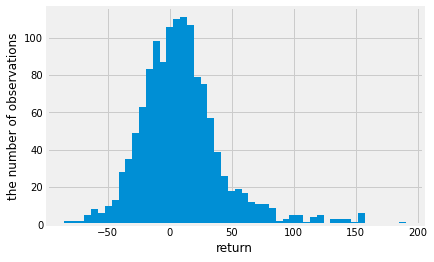

DescribeResult(nobs=1340, minmax=(-0.8544848484848484, 1.9018567639257293), mean=0.09442153640200235, variance=0.11888521649064611, skewness=1.144651524691345, kurtosis=3.1507116856549793)


<IPython.core.display.Javascript object>

In [15]:
df2018["return"] = (df2018["price2019"] - df2018["price"]) / df2018["price"]
df2018 = df2018[df2018["return"] <= 2]
(100 * df2018["return"]).hist(bins=50)
plt.xlabel("return")
plt.ylabel("the number of observations")
plt.show()
print(stats.describe(df2018["return"]))

In [16]:
df2018[df2018["enough_cash"] == 1]

,ticker,revenue,pb,debt,assets,netmargin,ncfo,shareswa,sps,opinc,...,OPER_MARGIN,CASH_FLOW_PER_SHARE,REVENUE_PER_SHARE,PX_FREE_CASH_FLOW,quick_ratio,TOT_DEBT_TO_TOTAL_ASSET,enough_cash,price2019,calendardate2019,return
2,ZTS,1.366000e+09,20.675,4.954000e+09,8.690000e+09,0.258,3.890000e+08,4.859000e+08,2.811,4.640000e+08,...,0.339678,0.801643,2.815022,29.384236,2.597000,0.570081,1,100.67,2019-03-31,0.205484
11,ZBH,2.017600e+09,1.846,1.111190e+10,2.718120e+10,0.087,4.905000e+08,2.030000e+08,9.939,3.050000e+08,...,0.151170,2.414509,9.931728,16.436539,0.929742,0.408808,1,127.70,2019-03-31,0.171130
16,YNDX,2.657300e+10,5.193,1.790300e+10,2.129050e+11,0.090,5.187000e+09,3.270667e+08,1.422,3.159000e+09,...,0.118880,15.896178,81.436119,0.947406,2.533172,0.084089,1,34.34,2019-03-31,-0.129531
23,XRX,2.435000e+09,1.320,5.489000e+09,1.617500e+10,0.009,2.160000e+08,2.546735e+08,9.561,1.340000e+08,...,0.055031,0.848145,9.561263,-36.476553,2.033312,0.339351,1,31.98,2019-03-31,0.111188
26,XOM,6.821100e+10,1.680,4.061700e+10,3.488260e+11,0.068,8.519000e+09,4.237462e+09,16.097,7.444000e+09,...,0.109132,2.010401,16.097135,21.726849,0.477747,0.116439,1,80.80,2019-03-31,0.082965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973,ABBV,7.934000e+09,42.303,3.728700e+10,6.934200e+10,0.351,2.645000e+09,1.591000e+09,4.987,2.903000e+09,...,0.365894,1.665646,4.996308,15.134314,0.897819,0.537726,1,80.59,2019-03-31,-0.148547
1974,ABB,6.441000e+09,3.790,7.761000e+09,4.356900e+10,0.089,-5.180000e+08,2.134000e+09,3.018,6.090000e+08,...,0.094551,-0.242214,3.011774,24.274029,0.691978,0.178131,1,18.87,2019-03-31,-0.205139
1978,AAPL,6.113700e+10,6.710,1.218400e+11,3.675020e+11,0.226,1.513000e+10,5.024877e+09,12.167,1.589400e+10,...,0.259974,2.981861,12.049043,15.413872,1.235423,0.331536,1,189.95,2019-03-31,0.132137
1983,AA,3.090000e+09,1.559,1.460000e+09,1.709600e+10,0.063,5.500000e+07,1.861756e+08,16.597,5.170000e+08,...,0.167314,0.295420,16.597233,10.502219,0.738239,0.085400,1,28.16,2019-03-31,-0.373665


<IPython.core.display.Javascript object>

Let's see the difference in return of cash_rich companies from 2018 to 2019, is there a significant difference? For doing so I create a dataframe 'cash_rich' and selected companies which
have > 1B. I substract the return of cash_rich companies in 2019 from the return of cash_rich companies in 2018. (1.5 times change in price)

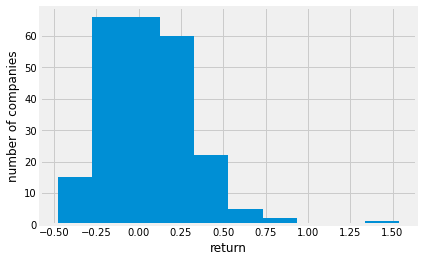

DescribeResult(nobs=237, minmax=(-0.4791373144033813, 1.5393034825870644), mean=0.05389797346484564, variance=0.06537746652207743, skewness=1.03261681648291, kurtosis=4.096356956661378)


<IPython.core.display.Javascript object>

In [17]:
cash_rich = df2018[df2018["enough_cash"] == 1]
plt.hist(cash_rich["return"]) #what I'm plotting
plt.xlabel('return') #what i chose to plot
plt.ylabel('number of companies') #y is always count and numbers. 
plt.show()
print(stats.describe(cash_rich["return"]))


now we're looking at cash weak companies' return in a year

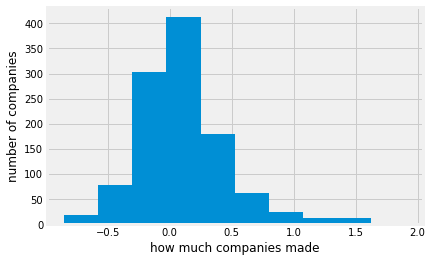

DescribeResult(nobs=1103, minmax=(-0.8544848484848484, 1.9018567639257293), mean=0.10312877521986828, variance=0.13002305445175777, skewness=1.1015188501523943, kurtosis=2.7832849383775278)


<IPython.core.display.Javascript object>

In [18]:
cash_weak = df2018[df2018["enough_cash"] == 0]
plt.hist(cash_weak["return"])
plt.xlabel("how much companies made")
plt.ylabel("number of companies")

plt.show()
print(stats.describe(cash_weak["return"]))

The data is independent, normally distributed,
therefore I will perform the t-test to see the difference in return between the cash_rich 
and the cash_weak companies at the given dateframe.

In [19]:
t, p = stats.ttest_ind(cash_rich["return"], cash_weak["return"])

<IPython.core.display.Javascript object>

In [20]:
t  # The t-value measures the size of the difference relative to the variation in the sample data.

-1.9964857235129818

<IPython.core.display.Javascript object>

In [21]:
p  # testing for the significant difference

0.046083403590288625

<IPython.core.display.Javascript object>

pvalue is < .05, stating that the returns are significantly different in means of cash rich from the cash weak stocks, from 2018 to 2019, therefore rejecting the null hypothesis. 

let's see below the best company which performed best from the cash rich category:

In [22]:
cash_rich[cash_rich["return"] == cash_rich["return"].max()]

,ticker,revenue,pb,debt,assets,netmargin,ncfo,shareswa,sps,opinc,...,OPER_MARGIN,CASH_FLOW_PER_SHARE,REVENUE_PER_SHARE,PX_FREE_CASH_FLOW,quick_ratio,TOT_DEBT_TO_TOTAL_ASSET,enough_cash,price2019,calendardate2019,return
1882,AMD,1.647000e+09,13.622,1.388000e+09,3.763000e+09,0.049,-107000000.0,968000000.0,1.701,120000000.0,...,0.07286,-0.110411,1.699497,143.571429,1.050678,0.368855,1,25.52,2019-03-31,1.539303


<IPython.core.display.Javascript object>

In [23]:
cash_rich[cash_rich["return"] == cash_rich["return"].max()][
    "ticker"
]  # checking the max return from the cash rich stocks

1882    AMD
Name: ticker, dtype: object

<IPython.core.display.Javascript object>

In [24]:
cash_weak[cash_weak["return"] == cash_weak["return"].max()][
    "ticker"
]  # the best performer among cash weak companies.

1221    GLUU
Name: ticker, dtype: object

<IPython.core.display.Javascript object>

In [25]:
cash_weak[cash_weak["return"] == cash_weak["return"].max()]

,ticker,revenue,pb,debt,assets,netmargin,ncfo,shareswa,sps,opinc,...,OPER_MARGIN,CASH_FLOW_PER_SHARE,REVENUE_PER_SHARE,PX_FREE_CASH_FLOW,quick_ratio,TOT_DEBT_TO_TOTAL_ASSET,enough_cash,price2019,calendardate2019,return
1221,GLUU,81443000.0,3.238,0.0,278832000.0,-0.088,-16465000.0,139108000.0,0.585,-6780000.0,...,-0.083248,-0.118033,0.583844,-18.944724,0.799135,0.0,0,10.94,2019-03-31,1.901857


<IPython.core.display.Javascript object>

In [26]:
cash_rich[cash_rich["return"] == cash_rich["return"].min()][
    "ticker"
]  # worst performer from the best companies

86    WDC
Name: ticker, dtype: object

<IPython.core.display.Javascript object>

In [27]:
cash_weak[cash_weak["return"] == cash_weak["return"].min()][
    "ticker"
]  # worst performer among weak stocks.

1636    CGIX
Name: ticker, dtype: object

<IPython.core.display.Javascript object>

Conclusion: The research proves that the hypothesis was right, by pvalue being significantly different in means for two groups:
cash rich and cash weak. Also found interesting stocks to look at for the futher research, one of them is GLUU. The stock belongs to a cash weak category but made 190% of return in one year. The stock went from the lowest(in 2 years) of $3 to 10.04$ 
The information might be valuable and beneficial to financial institutions, independent traders, long term 'buy and hold' investors, to day traders, swing traders. looking at undervalued stocks which make more than 50% return in one year might interest investors to track and see their performance over the years. Also there's an opportunity to wait until the stock goes the previous low or close to the low and buy it from that point, because it already has a past history where it can run more than 100%. Risk managment should be between 1% to 3% depending on the size of the shares and the size of the porfolio of the investors. The stock could be considered as a low risk - high reward one. 

The best performer from the cash rich stocks was AMD, which made 153% of return by the end of the Q1 of 2019, going from the lowest $9 a share in 3 years to $25.52 per share. It's a great finding for long-term hold. It has cash and assets of more than 1B. One of the few semiconductor companies in the USA which develops computer processors and related tech for business and consumer markets. 

the difference in returns not that big though, meaning that both categories are making equal ammount of returns. 
Interesting fact is that the p value is also barely below .05, let's figure out the confidence intervals and further analysis on the mean (-1)

In [28]:
x1 = cash_rich["return"]

<IPython.core.display.Javascript object>

In [29]:
x2 = cash_weak["return"]  
# the returns for cashweek were bigger .08 to 0.01 = 8% and 1%


<IPython.core.display.Javascript object>

In [30]:
signal = x1.mean() - x2.mean()
noise = np.sqrt(x1.var() / x1.size + x2.var() / x2.size)

ci_lo = signal - 1.96 * noise
ci_hi = signal + 1.96 * noise

<IPython.core.display.Javascript object>

In [31]:
(ci_lo, ci_hi)
# numbers - or + dont affect the numbers = means how much
# one is bigger than another.

(-0.08812263343518556, -0.010338970074859719)

<IPython.core.display.Javascript object>

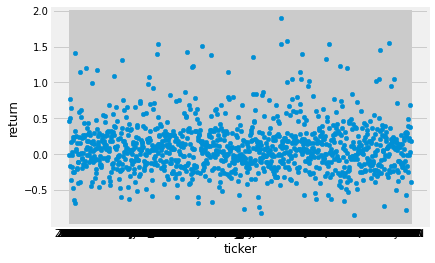

<IPython.core.display.Javascript object>

In [32]:
cash_weak.plot(x="ticker", y="return", kind="scatter")
plt.show()

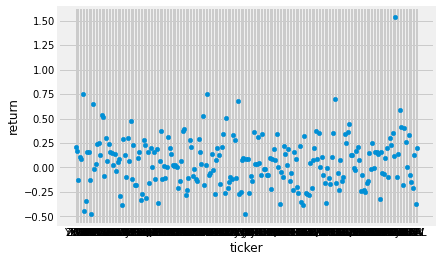

<IPython.core.display.Javascript object>

In [33]:
cash_rich.plot(x="ticker", y="return", kind="scatter")
plt.show()

In [34]:
# sns.pairplot(data=df2018, hue="ticker")

<IPython.core.display.Javascript object>

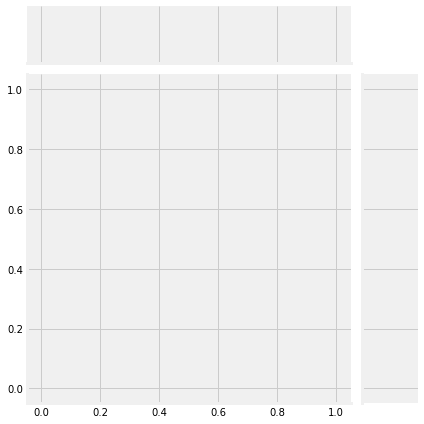

<IPython.core.display.Javascript object>

In [35]:
iris = sns.load_dataset("iris")
sns.jointplot(x=cash_rich, y=cash_weak, data=iris)

Means are significantly different between cash rish and cash week stocks. How different? 1% to 8%, cash weak stocks grew 1% - 8% more than cash rish ones. 
Meaning that both categores bring almost 
the equal ammount of return despite the fact that one of the categories have 1B in cash and the other one doesn't. 

There was a significant difference in returns between the 2 groups,
this difference is showing that cash_weak performed 1%-8% better than 
cash_rich as shown by a 95% confidence interval.
